<a href="https://colab.research.google.com/github/qnhhoa/DecisionSupportSystem/blob/main/Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import seaborn as sns

%matplotlib inline

In [3]:
# Train set
DOWNLOAD_URL = 'https://raw.githubusercontent.com/qnhhoa/DecisionSupportSystem/main/train.csv'
DATASET_DIR_PATH = '/content/drive/MyDrive/Colab Notebooks/DSS' # [directory path] để save dataset trên google drive
DATASET_PATH = os.path.join(DATASET_DIR_PATH, 'passenger_satis_raw.csv')

In [4]:
# Test set
TEST_URL = 'https://raw.githubusercontent.com/qnhhoa/DecisionSupportSystem/main/test.csv'
TESTSET_PATH = os.path.join(DATASET_DIR_PATH, 'test.csv')

# **Download and save dataset**

In [5]:
def fetch_data(download_url, dataset_path):
    try:
        urllib.request.urlretrieve(download_url, dataset_path)
    except:
        print(f"failed to download and save dataset in {dataset_path}")

In [6]:
fetch_data(DOWNLOAD_URL, DATASET_PATH)
fetch_data(TEST_URL, TESTSET_PATH)

# **Data Preprocessing**


In [7]:
# load dataset
df = pd.read_csv(DATASET_PATH)

In [8]:
# load testset
test_set = pd.read_csv(TESTSET_PATH)

In [9]:
df1 = pd.concat([df, test_set])

In [10]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df1.copy()

## **EDA - Exploratory Data Analysis**

### Decribe data





In [11]:
# kiểm tra 10 dòng đầu
df_cp.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [12]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [13]:
df_cp.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [14]:
df_cp.drop(columns=['Unnamed: 0','id'],axis=1, inplace=True)

In [15]:
def bar_plot(variable):
    # we get the features
    var = df_cp[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
     

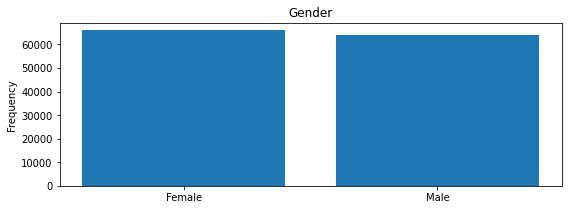

Gender: 
 Female    65899
Male      63981
Name: Gender, dtype: int64


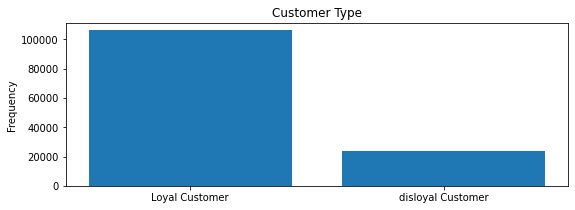

Customer Type: 
 Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


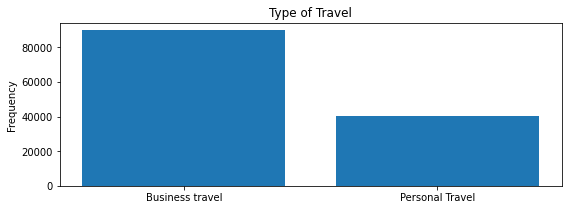

Type of Travel: 
 Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


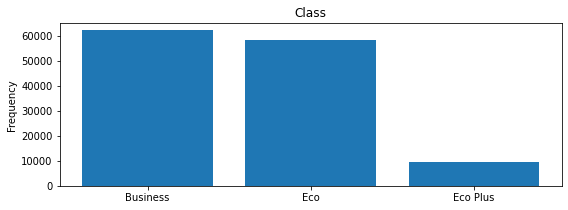

Class: 
 Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


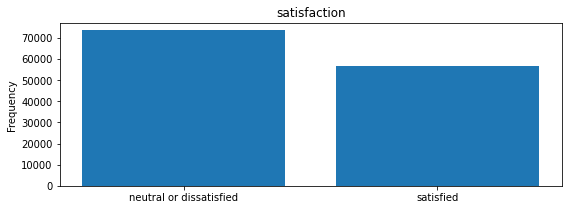

satisfaction: 
 neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [16]:
categorical_var = ["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for each in categorical_var:
    bar_plot(each)

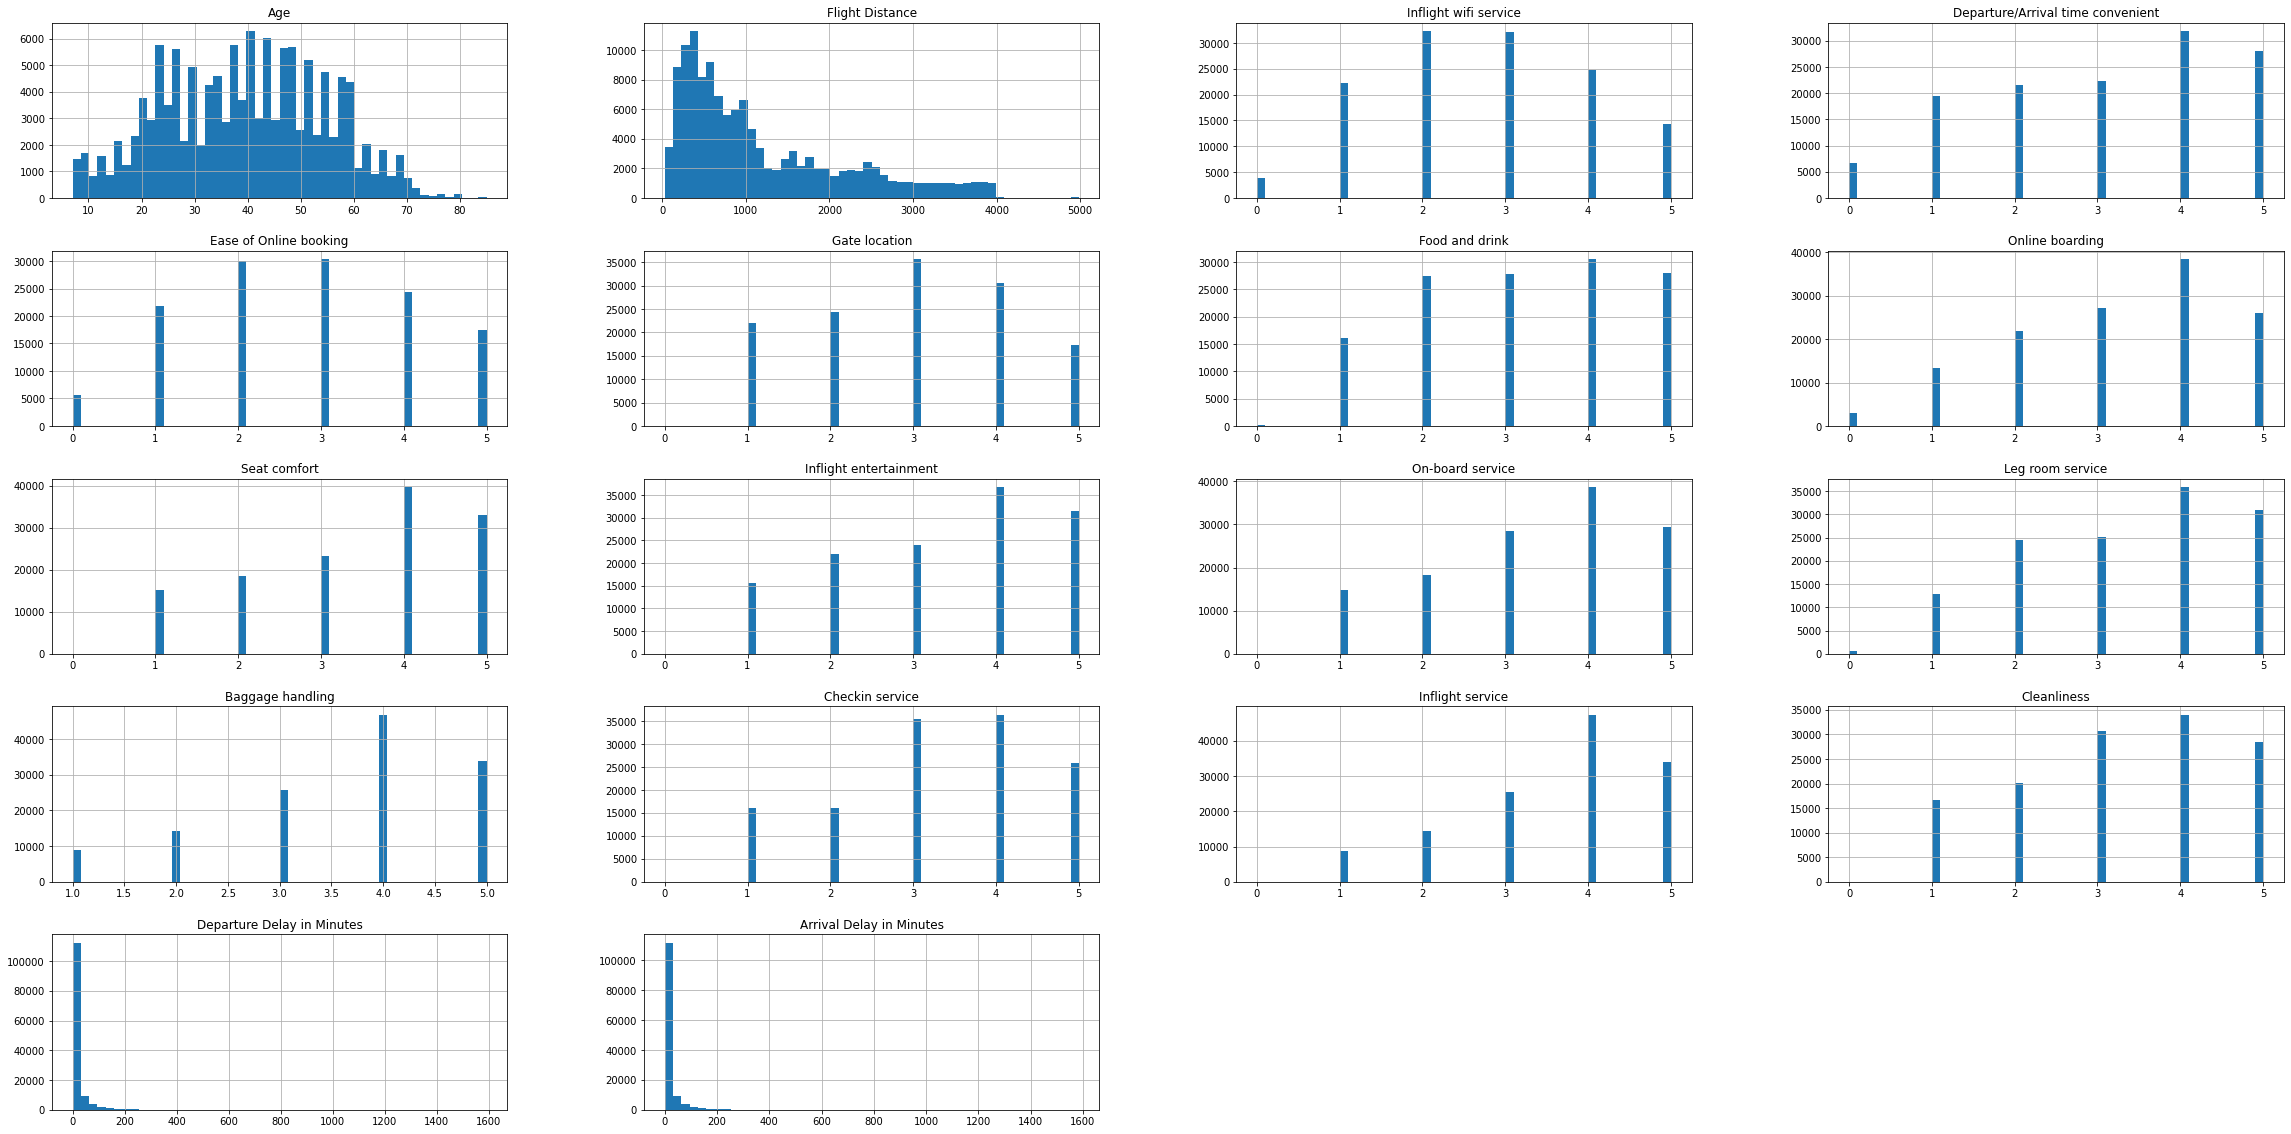

In [17]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(40, 20))
plt.show()

### Outliers

In [18]:
# Lấy ra những cột dạng numeric trong data
numeric = df_cp.select_dtypes(exclude='object')
numeric

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [19]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['satisfaction']]
cols_to_check

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [20]:
# # visualize outliers sử dụng boxplot
# fig, ax = plt.subplots(6, 3, figsize = (25, 15))
# ax = ax.flatten()
# for i, c in enumerate(cols_to_check):
#     sns.boxplot(x = df[c], ax = ax[i])
# fig.tight_layout()

### Handling Missing and Duplicate Data

In [21]:
# check dữ liệu NaN
df_cp.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [22]:
# xóa dữ liệu null
df_cp.dropna(inplace=True)

In [23]:
df_cp.duplicated().sum()

0

In [24]:
df_cp.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## **Data Cleaning**

### Xử lý Outliers

In [25]:
# outlier columns
outlier_cols = ["Flight Distance", "Checkin service"]

def outlier_thresholds(dataframe, variable):
    Q1 = df_cp[variable].quantile(0.25)
    Q3 = df_cp[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [26]:
df_cp = HandleOutliers(df_cp)

Flight Distance has 2847 outliers
Checkin service has 15790 outliers


In [27]:
df_cp.reset_index(drop=True, inplace = True)

In [28]:
df_cp.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
2,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
3,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
4,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
5,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
6,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
7,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied
8,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,4,...,2,3,3,5,3,5,2,0,0.0,neutral or dissatisfied
9,Female,Loyal Customer,12,Personal Travel,Eco Plus,308,2,4,2,2,...,1,1,2,5,5,5,1,0,0.0,neutral or dissatisfied


## **Feature Engineering**

### Encode features

In [29]:
df_cp["satisfaction"].value_counts()

neutral or dissatisfied    60499
satisfied                  50351
Name: satisfaction, dtype: int64

In [30]:
df_cp["Gender"].value_counts()

Female    56216
Male      54634
Name: Gender, dtype: int64

In [31]:
df_cp["Class"].value_counts()

Business    54232
Eco         48922
Eco Plus     7696
Name: Class, dtype: int64

In [32]:
df_cp["Type of Travel"].value_counts()

Business travel    75593
Personal Travel    35257
Name: Type of Travel, dtype: int64

In [33]:
df_cp["Customer Type"].value_counts()

Loyal Customer       90444
disloyal Customer    20406
Name: Customer Type, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

# encoder column
encoder = (OneHotEncoder(sparse=False,handle_unknown='ignore').fit_transform(df_cp[['Class']]))

# join to original df
# df_cp = df_cp.join(encoder)

encoder = pd.DataFrame(encoder)
encoder.columns = ['Business','Eco','Eco Plus']

In [35]:
encoder.head(10)

,Business,Eco,Eco Plus
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [36]:
df_cp = df_cp.join(encoder)

In [37]:
# df_cp['Gender'] = df_cp["Gender"].map({value:idx for idx, value in enumerate(df_cp["Gender"].value_counts().index)})
# df_cp['Customer Type'] = df_cp["Customer Type"].map({value:idx for idx, value in enumerate(df_cp["Customer Type"].value_counts().index)})
# df_cp['Type of Travel'] = df_cp["Type of Travel"].map({value:idx for idx, value in enumerate(df_cp["Type of Travel"].value_counts().index)})
# df_cp['satisfaction'] = df_cp["satisfaction"].map({value:idx for idx, value in enumerate(df_cp["satisfaction"].value_counts().index)})

In [38]:
df_cp['Gender'].replace({'Male':1,'Female':0}, inplace=True)
df_cp['Type of Travel'].replace({'Personal Travel':1,'Business travel':0}, inplace=True)
df_cp['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0}, inplace=True)
df_cp['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace = True)

In [39]:
# results
df_cp.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,1,13,1,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
1,0,1,26,0,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
2,1,1,61,0,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0
3,0,1,26,1,Eco,1180,3,4,2,1,...,4,4,4,1,0,0.0,0,0.0,1.0,0.0
4,1,1,47,1,Eco,1276,2,4,2,3,...,4,3,5,2,9,23.0,0,0.0,1.0,0.0
5,0,1,52,0,Business,2035,4,3,4,4,...,5,4,5,4,4,0.0,1,1.0,0.0,0.0
6,0,1,41,0,Business,853,1,2,2,2,...,1,4,1,2,0,0.0,0,1.0,0.0,0.0
7,1,0,20,0,Eco,1061,3,3,3,4,...,4,4,3,2,0,0.0,0,0.0,1.0,0.0
8,0,0,24,0,Eco,1182,4,5,5,4,...,5,3,5,2,0,0.0,0,0.0,1.0,0.0
9,0,1,12,1,Eco Plus,308,2,4,2,2,...,5,5,5,1,0,0.0,0,0.0,0.0,1.0


In [40]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110850 entries, 0 to 110849
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             110850 non-null  int64  
 1   Customer Type                      110850 non-null  int64  
 2   Age                                110850 non-null  int64  
 3   Type of Travel                     110850 non-null  int64  
 4   Class                              110850 non-null  object 
 5   Flight Distance                    110850 non-null  int64  
 6   Inflight wifi service              110850 non-null  int64  
 7   Departure/Arrival time convenient  110850 non-null  int64  
 8   Ease of Online booking             110850 non-null  int64  
 9   Gate location                      110850 non-null  int64  
 10  Food and drink                     110850 non-null  int64  
 11  Online boarding                    1108

### Feature Selection

#### Chi-square test

In [41]:
from sklearn.feature_selection import SelectKBest, chi2

In [42]:
categorical_features = df_cp[["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]]

In [43]:
best_features = SelectKBest(chi2, k=21)
best_features.fit(categorical_features, df_cp["satisfaction"])

SelectKBest(k=21, score_func=<function chi2 at 0x7f9ba38dec20>)

In [44]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
10,0.000000e+00,6618.061326,Seat comfort
17,0.000000e+00,5048.935881,Cleanliness
16,0.000000e+00,2110.626363,Inflight service
14,0.000000e+00,2198.092978,Baggage handling
13,0.000000e+00,5394.064480,Leg room service
12,0.000000e+00,4843.334170,On-board service
11,0.000000e+00,8884.609593,Inflight entertainment
19,0.000000e+00,13852.638944,Eco
9,0.000000e+00,15810.471683,Online boarding
20,0.000000e+00,15788.553476,Business


In [45]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0                                Gender
1                         Customer Type
2                                   Age
3                        Type of Travel
4                 Inflight wifi service
5     Departure/Arrival time convenient
6                Ease of Online booking
8                        Food and drink
9                       Online boarding
10                         Seat comfort
11               Inflight entertainment
12                     On-board service
13                     Leg room service
14                     Baggage handling
15                      Checkin service
16                     Inflight service
17                          Cleanliness
18                             Eco Plus
19                                  Eco
20                             Business
Name: columns, dtype: object

In [46]:
# chọn ra những features > alpha
df_score[df_score['p_values'] > 0.05]['columns']

7    Gate location
Name: columns, dtype: object

#### ANOVA F-test

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
df_cp = df_cp.dropna()

In [49]:
continous_features  = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [50]:
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df_cp["satisfaction"])

SelectKBest(k=3)

In [51]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
0,0.000000e+00,11352.022849,Flight Distance
2,1.453974e-69,311.248551,Arrival Delay in Minutes
1,1.520056e-52,232.966944,Departure Delay in Minutes


In [52]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0               Flight Distance
1    Departure Delay in Minutes
2      Arrival Delay in Minutes
Name: columns, dtype: object

### Data Scaling
Mục tiêu: Apply Data Normalization lên các continous features [Age, Flight Distance]

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
cols_to_scale = ["Age", "Flight Distance"]
scaler = MinMaxScaler()
df_cp[cols_to_scale] = scaler.fit_transform(df_cp[cols_to_scale])

In [55]:
# result
df_cp[cols_to_scale]

,Age,Flight Distance
0,0.076923,0.115696
1,0.243590,0.299622
2,0.692308,0.049353
3,0.243590,0.309871
4,0.512821,0.335761
...,...,...
110845,0.371795,0.108145
110846,0.346154,0.133495
110847,0.205128,0.165858
110848,0.128205,0.214941


In [56]:
df_cp.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,1,0.076923,1,Eco Plus,0.115696,3,4,3,1,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
1,0,1,0.243590,0,Business,0.299622,2,2,2,2,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
2,1,1,0.692308,0,Business,0.049353,3,3,3,3,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0
3,0,1,0.243590,1,Eco,0.309871,3,4,2,1,...,4,4,4,1,0,0.0,0,0.0,1.0,0.0
4,1,1,0.512821,1,Eco,0.335761,2,4,2,3,...,4,3,5,2,9,23.0,0,0.0,1.0,0.0
5,0,1,0.576923,0,Business,0.540453,4,3,4,4,...,5,4,5,4,4,0.0,1,1.0,0.0,0.0
6,0,1,0.435897,0,Business,0.221683,1,2,2,2,...,1,4,1,2,0,0.0,0,1.0,0.0,0.0
7,1,0,0.166667,0,Eco,0.277778,3,3,3,4,...,4,4,3,2,0,0.0,0,0.0,1.0,0.0
8,0,0,0.217949,0,Eco,0.310410,4,5,5,4,...,5,3,5,2,0,0.0,0,0.0,1.0,0.0
9,0,1,0.064103,1,Eco Plus,0.074703,2,4,2,2,...,5,5,5,1,0,0.0,0,0.0,0.0,1.0


### Final result

In [57]:
input = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes", "Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]].to_numpy()

In [58]:
input.shape

(110850, 23)

In [59]:
print(input)

[[ 0.11569579 25.         18.         ...  1.          0.
   0.        ]
 [ 0.29962244  0.          0.         ...  0.          0.
   1.        ]
 [ 0.04935275  0.          0.         ...  0.          0.
   1.        ]
 ...
 [ 0.16585761  0.          0.         ...  0.          0.
   1.        ]
 [ 0.21494067  0.          0.         ...  0.          1.
   0.        ]
 [ 0.29557713  0.          0.         ...  0.          0.
   1.        ]]


In [60]:
y = df_cp["satisfaction"].to_numpy()

In [61]:
y.shape

(110850,)

In [62]:
print(y)

[0 1 1 ... 1 0 1]


# **Xây dựng mô hình**

In [63]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import time

In [64]:
sns.set(font_scale=1.8)

## Gaussian Naive Bayes

In [65]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [66]:
start = time.process_time()   

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

totaltime = time.process_time() - start

In [67]:
print(f"time = {totaltime}")
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

time = 0.07677361799999893
Accuracy = 0.8498421290031574
                         precision    recall  f1-score   support

              satisfied       0.85      0.88      0.86     12100
neutral or dissatisfied       0.85      0.81      0.83     10070

               accuracy                           0.85     22170
              macro avg       0.85      0.85      0.85     22170
           weighted avg       0.85      0.85      0.85     22170



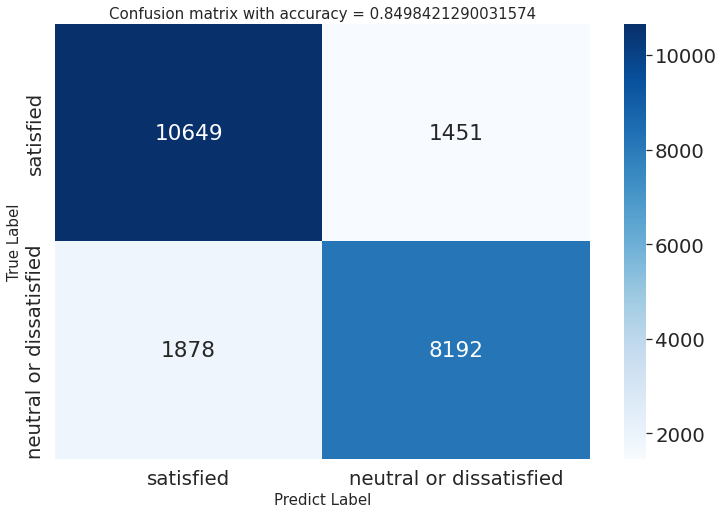

In [68]:
gauss_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(gauss_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## Logistic Regression

In [69]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [70]:
start = time.process_time() 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

totaltime = time.process_time() - start

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [71]:
print(f"time = {totaltime}")
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

time = 4.1692575640000005
Accuracy = 0.8737483085250338
                         precision    recall  f1-score   support

              satisfied       0.88      0.89      0.88     12100
neutral or dissatisfied       0.86      0.86      0.86     10070

               accuracy                           0.87     22170
              macro avg       0.87      0.87      0.87     22170
           weighted avg       0.87      0.87      0.87     22170



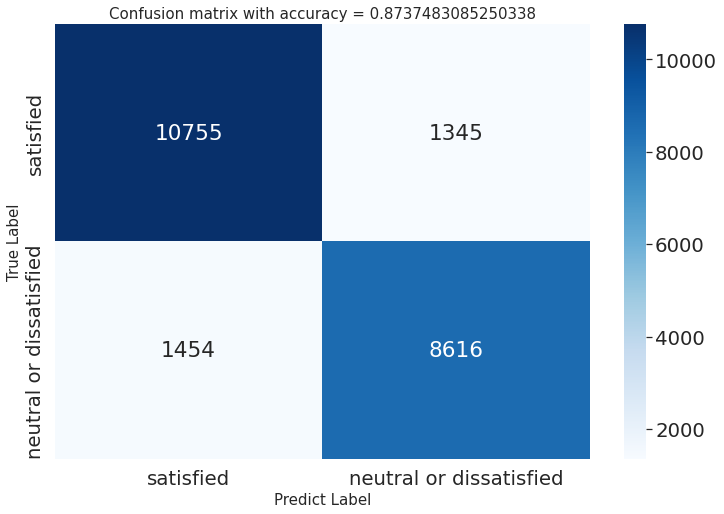

In [72]:
log_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(log_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## Decision Trees

In [73]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [74]:
start = time.process_time()   

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

totaltime = time.process_time() - start

In [75]:
print(f"time = {totaltime}")
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

time = 0.6679310690000015
Accuracy = 0.9476770410464592
                         precision    recall  f1-score   support

              satisfied       0.95      0.95      0.95     12100
neutral or dissatisfied       0.94      0.94      0.94     10070

               accuracy                           0.95     22170
              macro avg       0.95      0.95      0.95     22170
           weighted avg       0.95      0.95      0.95     22170



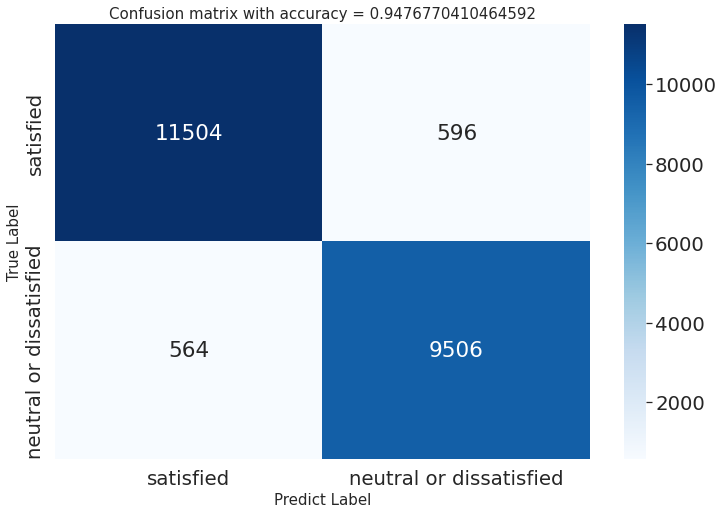

In [76]:
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(dt_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

## Random Forest

In [77]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [78]:
start = time.process_time()   

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

totaltime = time.process_time() - start

In [79]:
print(f"time = {totaltime}")
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

time = 11.398894375000001
Accuracy = 0.961659900766802
                         precision    recall  f1-score   support

              satisfied       0.95      0.98      0.97     12100
neutral or dissatisfied       0.97      0.94      0.96     10070

               accuracy                           0.96     22170
              macro avg       0.96      0.96      0.96     22170
           weighted avg       0.96      0.96      0.96     22170



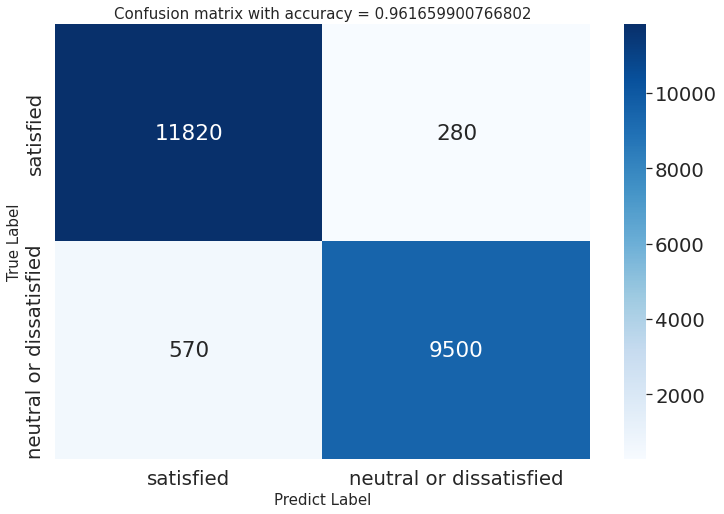

In [80]:
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(rf_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

In [81]:
# Saving model
import pickle as pkl
pkl.dump(rf, open("rf_model.pkl", "wb"))

## XGBoost

In [82]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [83]:
start = time.process_time()   

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

totaltime = time.process_time() - start

In [84]:
print(f"time = {totaltime}")
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

time = 6.999313170000001
Accuracy = 0.9407307171853857
                         precision    recall  f1-score   support

              satisfied       0.94      0.96      0.95     12100
neutral or dissatisfied       0.95      0.92      0.93     10070

               accuracy                           0.94     22170
              macro avg       0.94      0.94      0.94     22170
           weighted avg       0.94      0.94      0.94     22170



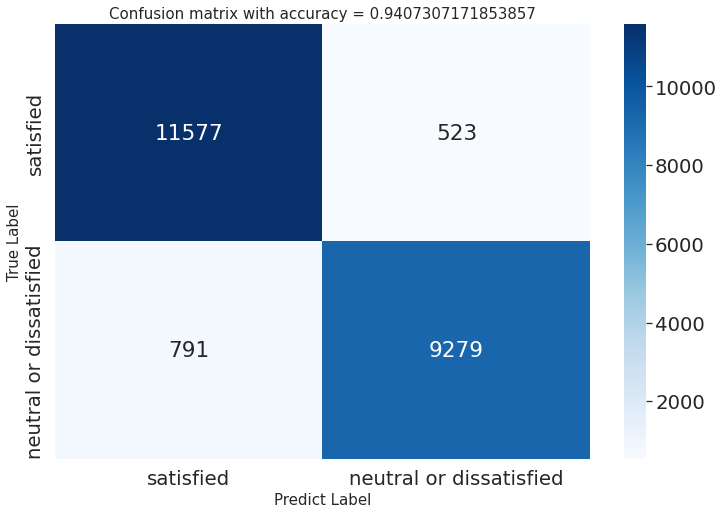

In [85]:
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(xgb_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["satisfied", "neutral or dissatisfied"], yticklabels=["satisfied", "neutral or dissatisfied"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

# GridSearchCV

In [86]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

In [87]:
# X = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes", "Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
#                               "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
#                               "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]]
# y = df_cp["satisfaction"]

In [88]:
# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)

In [89]:
# # check giá trị sau khi oversampling
# y_sm.value_counts()

In [90]:
# input = X_sm.to_numpy()
# y = y_sm.to_numpy()

In [91]:
# y.shape

## Logistic Regression

In [92]:
# from sklearn.model_selection import GridSearchCV
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# train_index, val_index = next(iter(sss.split(input, y)))
# X_train, X_test = input[train_index], input[val_index]
# y_train, y_test = y[train_index], y[val_index]

In [93]:
# logreg = LogisticRegression()
# parameters = [{'C':[0.1,0.5, 1.0, 10.0], 
#                'solver':['sag', 'liblinear', 'lbfgs']}]

# model_lr_grid = GridSearchCV(estimator = logreg,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 3,
#                            verbose=0)

In [94]:
# model_lr_grid.fit(X_train, y_train)

In [95]:
# model_lr_grid.best_params_

In [96]:
# y_pred = model_lr_grid.predict(X_test)

In [97]:
# print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

## XGBOOST

In [98]:
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1715)

# train_index, val_index = next(iter(sss.split(input, y)))
# X_train, X_test = input[train_index], input[val_index]
# y_train, y_test = y[train_index], y[val_index]

In [99]:
# model_xgb= XGBClassifier()
# parameters = {'n_estimators':[10, 20, 30, 40, 50, 100, 200],'max_depth':[3, 4, 5, 6],'learning_rate':[0.1, 0.5, 1]}
# model_xgb_grid = GridSearchCV(model_xgb, 
#                               parameters,
#                               cv=3,
#                               verbose=0)

In [100]:
# model_xgb_grid.fit(X_train, y_train)

In [101]:
# model_xgb_grid.best_params_

In [102]:
# y_pred = model_xgb_grid.predict(X_test)

In [103]:
# print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

In [104]:
# load the model from disk
loaded_model = pickle.load(open("rf_model.pkl", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.961659900766802


In [105]:
X_test.shape

(22170, 23)

## Random Forest

In [106]:
# from sklearn.model_selection import GridSearchCV
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# train_index, val_index = next(iter(sss.split(input, y)))
# X_train, X_test = input[train_index], input[val_index]
# y_train, y_test = y[train_index], y[val_index]

In [107]:
# rfc=RandomForestClassifier(random_state=42)
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [108]:
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [109]:
# CV_rfc.fit(X_train, y_train)

In [110]:
# CV_rfc.best_params_

In [111]:
# y_pred = CV_rfc.predict(X_test)

In [112]:
# print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred, target_names=["satisfied", "neutral or dissatisfied"]))

# **Application**

In [113]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 9.3 MB/s 
     |████████████████████████████████| 164 kB 48.5 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 4.7 MB 36.7 MB/s 
     |████████████████████████████████| 237 kB 25.3 MB/s 
     |████████████████████████████████| 182 kB 42.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 4.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=e59542e43b7fa1e78345793da12c25d9d2ddf0bac6b6278e719e48c1088e5d04
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.

In [114]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()

#Load the saved model
model = pickle.load(open("rf_model.pkl", "rb"))

st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")

def preprocess(distance ,depDelay ,arrDelay ,gender ,cusType ,age ,typetrvl ,wifi ,timeConve ,booking ,food ,board ,seat ,entertain ,onboard ,leg ,bag ,checkin ,inflight ,clean ,cusClass ):   

     if gender == "Male":
         gender = 1
     else:
         gender = 0
     if cusType == "disloyal Customer":
         cusType = 0
     else:
         cusType = 1
     if typetrvl == "Business travel":
         typetrvl = 0
     else:
         typetrvl = 1
    
     li_class = { "business": 0, "eco": 0, "eco plus": 0}
     if items.cusClass in li_class:
         li_class[items.cusClass] = 1

     age = (items.age - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
     distance = (items.distance - df["Flight Distance"].min()) / (df["Flight Distance"].max() - df["Flight Distance"].min())

    user_input=[distance ,depDelay ,arrDelay ,gender ,cusType ,age ,typetrvl ,wifi ,timeConve ,booking ,food ,board ,seat ,entertain ,onboard ,leg ,bag ,checkin ,inflight ,clean ,cusClass ]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Amlan Mohanty ')
      
# following lines create boxes in which user can enter data required to make prediction
distance=st.number_input('Insert flight distance')
depDelay = st.number_input('Insert Departure Delay in Minutes')
arrDelay = st.number_input('Insert Arrival Delay in Minutes')
gender = st.radio("Select Gender: ", ('Male', 'Female'))
cusType = st.radio("Customer Type?",("Loyal Customer", "disloyal Customer"))
age=st.selectbox ("Age",range(1,121,1))
typetrvl = st.radio("Type of travel?",("Business travel", "Personal Travel"))
wifi = st.select_slider("Inflight wifi service?",options=["1","2", "3", "4", "5"])
timeConve = st.select_slider("Departure/Arrival time convenient?",options=["1","2", "3", "4", "5"])
booking = st.select_slider("Ease of Online booking?",options=["1","2", "3", "4", "5"])
food = st.select_slider("Food and drink?",options=["1","2", "3", "4", "5"])
board = st.select_slider("Online boarding?",options=["1","2", "3", "4", "5"])
seat = st.select_slider("Seat comfort?",options=["1","2", "3", "4", "5"])
entertain= st.select_slider("Inflight entertainment?",options=["1","2", "3", "4", "5"])
onboard = st.select_slider("On-board service?",options=["1","2", "3", "4", "5"])
leg = st.select_slider("Leg room service?",options=["1","2", "3", "4", "5"])
bag = st.select_slider("Baggage handling?",options=["1","2", "3", "4", "5"])
checkin = st.select_slider("Checkin service?",options=["1","2", "3", "4", "5"])
inflight = st.select_slider("Inflight service?",options=["1","2", "3", "4", "5"])
clean = st.select_slider("Cleanlines?",options=["1","2", "3", "4", "5"])
class = st.selectbox('Customer Class?',("Business", "Eco", "Eco Plus")) 


pred=preprocess(distance ,depDelay ,arrDelay ,gender ,cusType ,age ,typetrvl ,wifi ,timeConve ,booking ,food ,board ,seat ,entertain ,onboard ,leg ,bag ,checkin ,inflight ,clean ,cusClass )


if st.button("Predict"):    
  if pred[0] == 0:
    st.error('neutral or dissatisfied')
    
  else:
    st.success('satisfied')


st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")



Writing healthy-heart-app.py


In [115]:
!nohup streamlit run healthy-heart-app.py &
url = ngrok.connect(port='8501')
url

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
nohup: appending output to 'nohup.out'
Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: app.py


In [116]:
# import requests

# import streamlit as st

# # Define the title
# # st.title("Car evaluation web application")
# # st.write(
# #     "The model evaluates a cars acceptability based on the inputs below.\
# #     Pass the appropriate details about your car using the questions below to discover if your car is acceptable."
# # )

# # Input 1
# gender = st.radio(
#     "Gender?",
#     ("Female","Male")
# )
# # Input 2
# cusType = st.radio(
#     "Customer Type?",
#     ("Loyal Customer", "disloyal Customer")
# )
# # Input 3
# age = st.number_input('Insert your age')
# # Input 4
# typetrvl = st.radio(
#     "Type of travel?",
#     ("Business travel", "Personal Travel")
# )
# #Input 5
# cusClass = st.radio(
#     "Class?",
#     ("Business", "Eco", "Eco Plus")
# )
# #Input 6
# distance = st.number_input('Insert flight distance')
# #Input 7
# depDelay = st.number_input('Insert Departure Delay in Minutes')
# #Input 8
# arrDelay = st.number_input('Insert Arrival Delay in Minutes')
# #Input 9
# wifi = st.select_slider(
#     "Inflight wifi service?",
#     options=["1","2", "3", "4", "5"]
# )
# # Input 10
# timeConve = st.select_slider(
#     "Departure/Arrival time convenient?",
#     options=["1","2", "3", "4", "5"]
# )
# # Input 11
# booking = st.select_slider(
#     "Ease of Online booking?",
#     options=["1","2", "3", "4", "5"]
# )
# # Input 12
# food = st.select_slider(
#     "Food and drink?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 13
# board = st.select_slider(
#     "Online boarding?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 14
# seat = st.select_slider(
#     "Seat comfort?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 15
# entertain= st.select_slider(
#     "Inflight entertainment?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 16
# onboard = st.select_slider(
#     "On-board service?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 17
# leg = st.select_slider(
#     "Leg room service?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 18
# bag = st.select_slider(
#     "Baggage handling?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 19
# checkin = st.select_slider(
#     "Checkin service?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 20
# inflight = st.select_slider(
#     "Inflight service?",
#     options=["1","2", "3", "4", "5"]
# )
# #Input 21
# clean = st.select_slider(
#     "Cleanlines?",
#     options=["1","2", "3", "4", "5"]
# )
# # Class values to be returned by the model
# class_values = {
#     0: "neutral or dissatisfied",
#     1: "satisfied"
#     }
# # When 'Submit' is selected
# if st.button("Submit"):

#     # Inputs to ML model
#     inputs = {
#         "inputs": [
#             {
#                 "gender": gender,
#                 "cusType": cusType,
#                 "age": age,
#                 "typetrvl": typetrvl,
#                 "cusClass": cusClass,
#                 "distance": distance,
#                 "depDelay": depDelay,
#                 "arrDelay": arrDelay,
#                 "wifi": wifi,
#                 "timeConve": timeConve,
#                 "booking": booking,
#                 "food": food,
#                 "board": board,
#                 "seat": seat,
#                 "entertain": entertain,
#                 "onboard": onboard,
#                 "leg": leg,
#                 "bag": bag,
#                 "checkin": onboard,
#                 "inflight": inflight,
#                 "clean": clean
#             }
#         ]
#         }
       
#     # Posting inputs to ML API
#     response = requests.post(f"http://host.docker.internal:8001/api/v1/predict/", json=inputs, verify=False)
#     json_response = response.json()

#     prediction = class_values[json_response.get("predictions")[0]]

#     st.subheader(f"This car is **{prediction}!**")

In [117]:
# !pip install pydantic
# !pip install fastapi
# !pip install uvicorn
# !pip install colabcode

In [118]:
# from pydantic import BaseModel
# from fastapi import FastAPI
# from colabcode import ColabCode

In [119]:
# cc = ColabCode(port=5000, code=False)

In [120]:
# df_cp.info()

In [121]:
# class ITEMS(BaseModel):
#     distance: float
#     depDelay: int
#     arrDelay: float
#     gender: str
#     cusType: str
#     age: int
#     typetrvl: str
#     wifi: int
#     timeConve: int
#     booking: int
#     food: int
#     board: int
#     seat: int
#     entertain: int
#     onboard: int
#     leg: int
#     bag: int
#     checkin: int
#     inflight: int
#     clean: int
#     cusClass: str



In [122]:
# app = FastAPI()
# model = pickle.load(open("rf_model.pkl", "rb"))

# @app.get("/")
# async def index():
#     return {"text": "hello"}

# @app.put("/predict")
# async def predict(items: ITEMS):
#     if items.gender == "Male":
#         gender = 1
#     else:
#         gender = 0
#     if items.cusType == "disloyal Customer":
#         cusType = 0
#     else:
#         cusType = 1
#     if items.typetrvl == "Business travel":
#         typetrvl = 0
#     else:
#         typetrvl = 1
    
#     li_class = { "business": 0, "eco": 0, "eco plus": 0}
#     if items.cusClass in li_class:
#         li_class[items.cusClass] = 1

#     age = (items.age - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
#     distance = (items.distance - df["Flight Distance"].min()) / (df["Flight Distance"].max() - df["Flight Distance"].min())

    # types = {
    #    0: "neutral or dissatisfied 0",
    #    1: "satisfied 1"
    # }
   
#     prediction = list(map(lambda x: types[x], model.predict([[distance, items.depDelay,items.arrDelay, gender,cusType, age, typetrvl, items.wifi,items.timeConve, items.booking, items.food, items.board, items.seat, items.entertain, items.onboard, items.leg, items.bag, items.checkin, items.inflight, items.clean,li_class["eco"], li_class["eco plus"], li_class["business"]]]).tolist()))
#     return {"predict": prediction}

In [123]:
# !ngrok authtoken 29Jiw4zse9fyhQTqost16CJgRHc_33rG2WxCMejiooaWj3mHB

In [124]:
# cc.run_app(app=app)